# House price analysis

## Overview

The goal of this project is to predict house prices based on collected data from the Connecticut State. The dataset covers the years 2001 to 2020 and includes various features relevant to house prices. More detailed information about the dataset can be found at the following link:

Source data: https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020/data

The first step is to import all necessary libraries. At this stage, we will import the packages required for data overview and cleaning. In subsequent sections, we will import additional libraries as needed for modeling and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Discovering the dataset

This section focuses on exploring the dataset to understand its structure and content. We will examine the data types of each column and generate summary statistics.

In [3]:
# Load data as DataFrame
df = pd.read_csv(r'../data/input/Real_Estate_Sales_2001-2020_GL.csv')
df.head()

/tmp/ipykernel_714/677864093.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/input/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [5]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [6]:
df['Property Type'].unique()

array(['Residential', 'Commercial', 'Vacant Land', 'Public Utility',
       'Apartments', nan, 'Industrial', 'Condo', 'Two Family',
       'Single Family', 'Three Family', 'Four Family'], dtype=object)

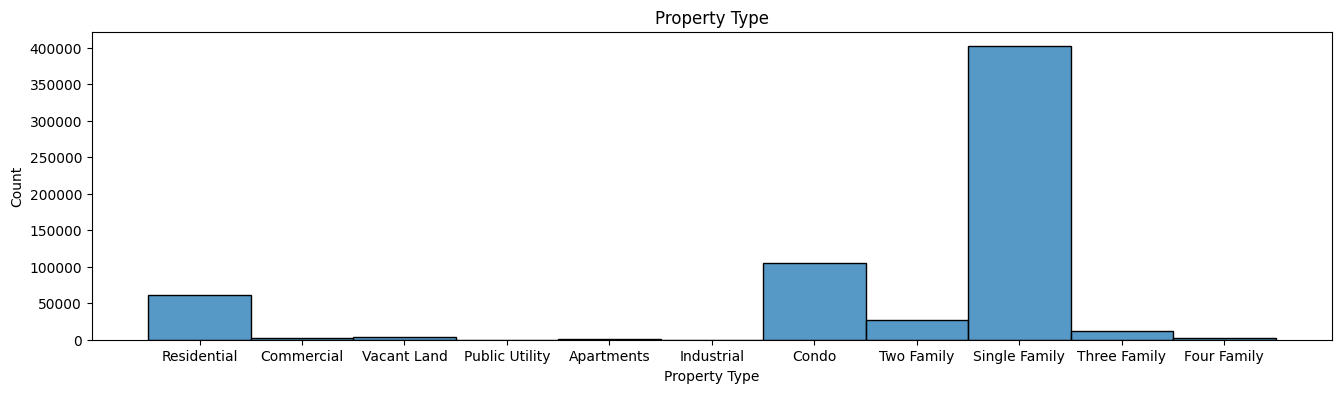

In [7]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Property Type')
plt.ylabel('Count')
plt.title('Property Type')
plt.show()

In [8]:
df['Residential Type'].unique()

array(['Single Family', 'Three Family', nan, 'Two Family', 'Condo',
       'Four Family'], dtype=object)

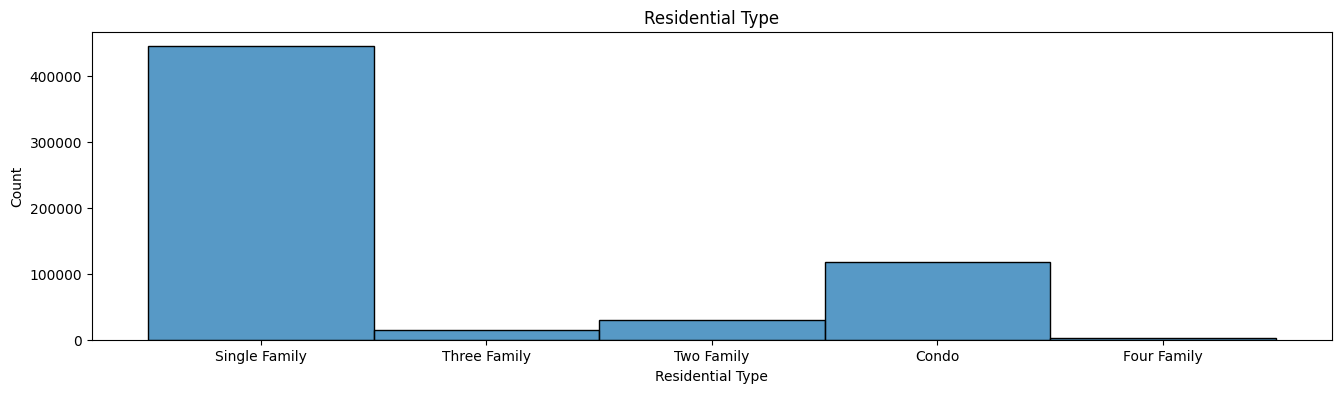

In [9]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Residential Type')
plt.ylabel('Count')
plt.title('Residential Type')
plt.show()

In [10]:
# df['Town'].unique()

len(df['Town'].unique())

170

## Data Cleaning and Wrangling

In this chapter, we focus on preparing our dataset for analysis and modeling. Proper data cleaning and wrangling are essential steps to ensure the quality and accuracy of our predictions. We will address issues such as duplicates, outliers, and missing values, and transform the data into a more usable format.

### Duplicates

In this section, we will identify and remove any duplicate records from our dataset to ensure that each observation is unique and contributes meaningful information.

In [11]:
duplicate_rows = df[df.duplicated(keep='first')]
duplicate_rows

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


In [12]:
duplicate_rows.shape

(0, 14)

There are no duplicates, so this part is finished.

### Outliers
Outliers are data points that differ significantly from other observations and can distort statistical analyses and model performance. We will detect and handle outliers by either removing them or transforming the data to minimize their impact.

**Example**:
The estimated value of a house was $100 because it was dilapidated in a bad neighborhood and was purchased for $12.000. Because of that we have sales ratio equal to 120, very low assessed value and quite low sale amount compared to the dataset. There are cases where house was saled for $5 000.000.000 while mean vale of house is $390.000. Some models can generalize this fact.

Sometimes a given feature  (e.g. being a nobel prize winner in physis) is so rare that we don't have enough observations that have it for the model to draw conclusion from it. Sometimes we can decide to combine such small subpopulations, especially if we suspect that they don't show significant differences. However in our case we can drop outliers.

<Axes: title={'center': 'Sales per year'}, xlabel='List Year'>

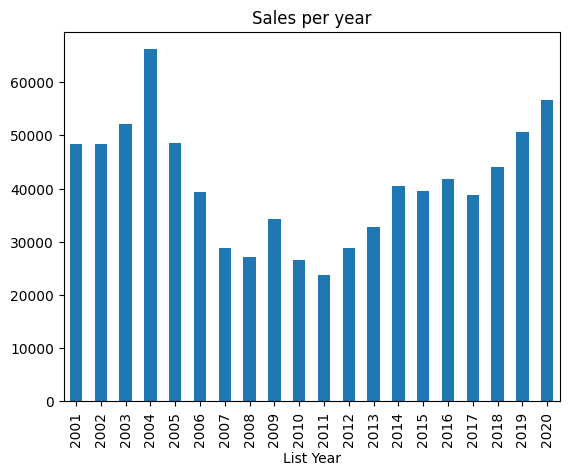

In [21]:
df['List Year'].value_counts().sort_index().plot(kind='bar',
                                            label='Year',
                                            title='Sales per year')

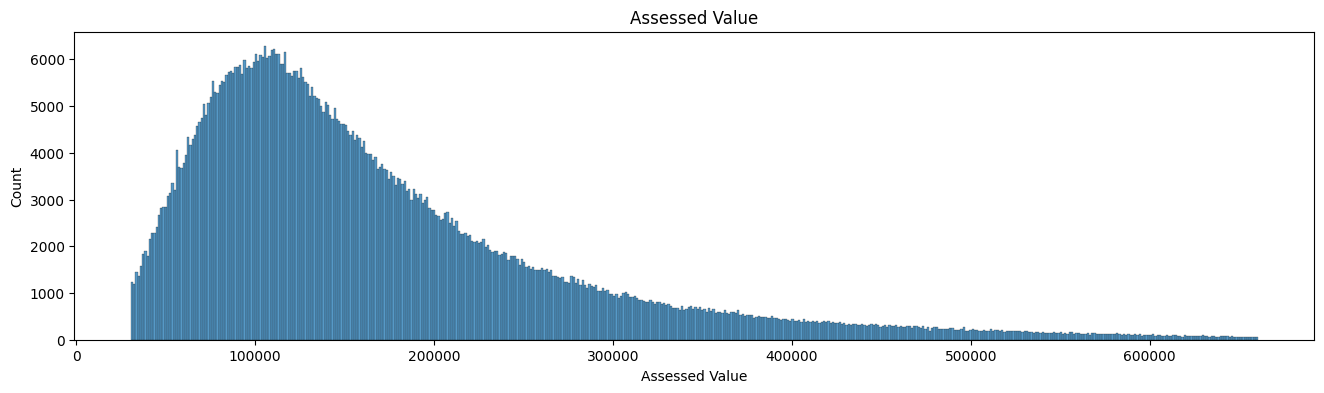

In [22]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Assessed Value', bins=500)
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel('Count')
plt.title('Assessed Value')
plt.show()

In [15]:
print('Assessed value, quantile 0.05', df['Assessed Value'].quantile(.05))
print('Assessed value, quantile 0.95', df['Assessed Value'].quantile(.95))

Assessed value, quantile 0.05 30450.0
Assessed value, quantile 0.95 660590.0


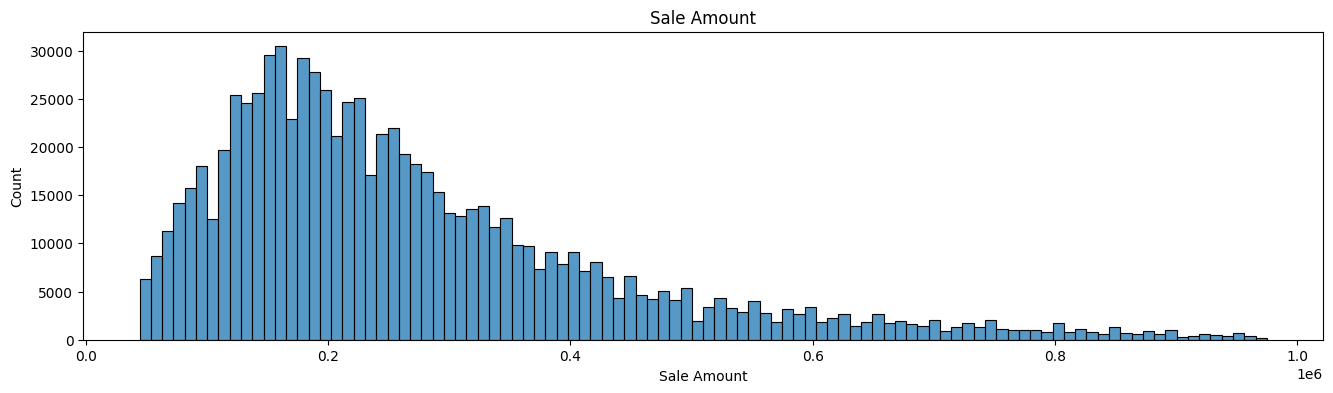

In [23]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Sale Amount', bins=100)
# plt.yscale('log')
plt.ylabel('Count')
plt.title('Sale Amount')
plt.show()

In [17]:
df.loc[df['Sale Amount']>1E7].shape
print('Sale Amount, quantile 0.05', df['Sale Amount'].quantile(.05))
print('Sale Amount, quantile 0.95', df['Sale Amount'].quantile(.95))

Sale Amount, quantile 0.05 44305.40000000005
Sale Amount, quantile 0.95 975000.0


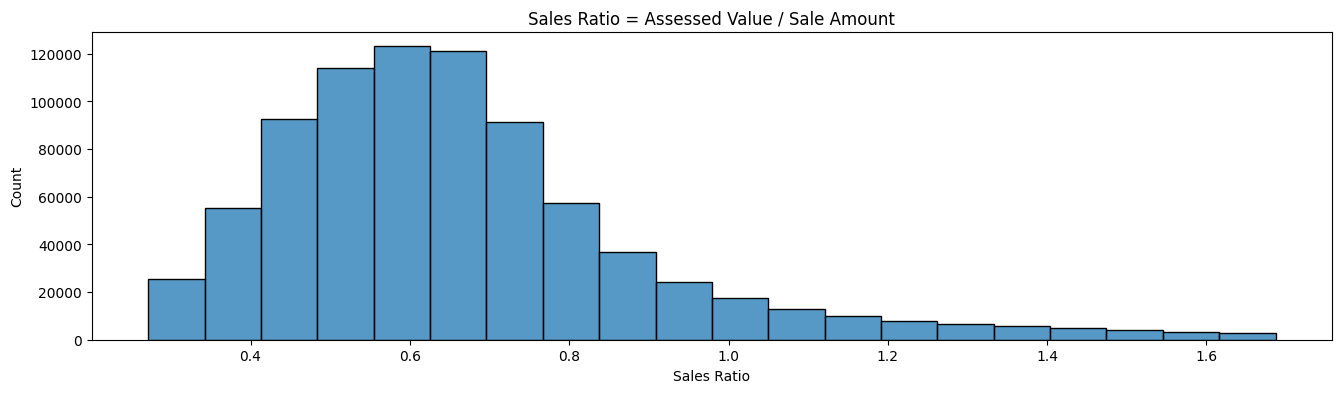

In [24]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Sales Ratio', bins=20)
# plt.yscale('log')
plt.ylabel('Count')
plt.title('Sales Ratio = Assessed Value / Sale Amount')
plt.show()

In [19]:
print('Sales Ratio, quantile 0.05', df['Sales Ratio'].quantile(.05))
print('Sales Ratio, quantile 0.95', df['Sales Ratio'].quantile(.95))

Sales Ratio, quantile 0.05 0.2716
Sales Ratio, quantile 0.95 1.686741677599995


Having informations about outliers we can remove those records from the dataset. On the other hand we also can try to group them with mask function and compare final results.

After that we can run again previous code (plots).

In [20]:
# # Grouping small groups
# df['Assessed Value'] = df['Assessed Value'].mask(df['Assessed Value'] > 1E7, 1E7)
# df['Assessed Value'] = df['Assessed Value'].mask(df['Assessed Value'] < 1E4, 1E4)

# df['Sale Amount'] = df['Sale Amount'].mask(df['Sale Amount'] > 1E7, 1E7)
# df['Sale Amount'] = df['Sale Amount'].mask(df['Sale Amount'] < 1E4, 1E4)

# df['Sales Ratio'] = df['Assessed Value'] / df['Sale Amount']

# Removing outliers
df = df.loc[(df['Assessed Value']>df['Assessed Value'].quantile(.05)) & (df['Assessed Value']<df['Assessed Value'].quantile(.95)) &
            (df['Sale Amount']>df['Sale Amount'].quantile(.05)) & (df['Sale Amount']<df['Sale Amount'].quantile(.95)) &
            (df['Sales Ratio']>df['Sales Ratio'].quantile(.05)) & (df['Sales Ratio']<df['Sales Ratio'].quantile(.95))]


In [25]:
df.shape

(817368, 14)

### NA Values & Data Wrangling

This section will cover methods to handle NA values, like imputation, removal, and other techniques to ensure that our dataset remains robust and complete.

In [26]:
# Count missing values
column_missing_values = df.isna().sum()
column_missing_values

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                 10
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       290275
Residential Type    293349
Non Use Code        639173
Assessor Remarks    711328
OPM remarks         809322
Location            653539
dtype: int64

Some columns in our dataset contain a high percentage of missing values, specifically [Non Use Code, Assessor Remarks, OPM Remarks, Location], which have over 70% NA values. Due to the sparsity of data in these columns, they will not be considered in further analysis and modeling as the incomplete data could lead to unreliable insights and predictions.

The [Address] column, which includes street and apartment numbers, will also be excluded from the training dataset. While the address can provide specific location information, it introduces challenges: high cardinality and irrelevance to target variable.

In [44]:
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location', 'Address']
df_dropped = df.drop(columns=columns_to_drop)

Rows where [Property Type, Residential Type] have a lot of missing values. We should look a bit colser to it.

In [45]:
df_dropped.loc[(df_dropped['Property Type'].isna()) & (df_dropped['Residential Type'].isna())].shape

print('Property type: ', df_dropped['Property Type'].unique())

print('Residential type: ', df_dropped['Residential Type'].unique())

df_dropped['Residential Type'].isna().sum()/len(df_dropped)

Property type:  ['Residential' 'Commercial' 'Vacant Land' 'Public Utility' 'Apartments'
 nan 'Industrial' 'Condo' 'Two Family' 'Single Family' 'Three Family'
 'Four Family']
Residential type:  ['Single Family' 'Three Family' nan 'Two Family' 'Condo' 'Four Family']


0.35889464720909064

We need to group property/residential type and handle nulls -> residential type (35.1%) and property type (34.7%). It's too much to remove (but we can compare this with impact caused by removing these rows). In that case we can change nulls to 'unknown' or think about advanced technique to fill missing values (e.g based on town, cost and propability of that type in this city or global).

In [46]:
df_dropped['Property Type'] = np.where((df_dropped['Property Type'].notna()) & (df_dropped['Property Type'] != 'Single Family'), 'Other', df_dropped['Property Type'])
df_dropped['Residential Type'] = np.where((df_dropped['Residential Type'].notna()) & (df_dropped['Residential Type'] != 'Single Family'), 'Other', df_dropped['Residential Type'])

In [47]:
df_dropped['Residential Type'].fillna('Unknown', inplace=True)
df_dropped['Property Type'].fillna('Unknown', inplace=True)

/tmp/ipykernel_714/1195654747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['Residential Type'].fillna('Unknown', inplace=True)
/tmp/ipykernel_714/1195654747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [48]:
df_dropped.isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

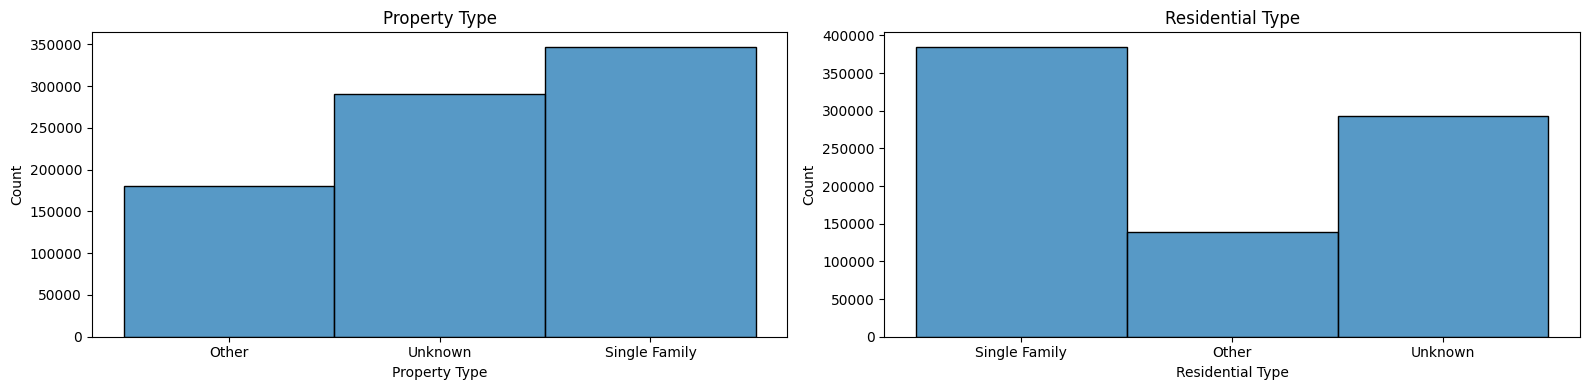

In [49]:
# Create property and residential type after changes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(data=df_dropped, x='Property Type', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Property Type')

sns.histplot(data=df_dropped, x='Residential Type', ax=ax2)
ax2.set_ylabel('Count')
ax2.set_title('Residential Type')

plt.tight_layout()
plt.show()

Last step is data wrangling. The last columns we should deal with are [Date Recorded, Towns].

The recorded date is now in an unusable format. We should divide it. We expect home values ​​to increase year by year and month by month, so the day (e.g. Monday, Friday) may impact sales.

Town situation is different. During coding categorical variables we will need to choose proper encoder, lets focus on 2 the most usefull in this case:
- Oridnal/Label Encoder - assign numbers arbitrarily to the categories. We will have 1 encoded column with values 0,1,2...169, however this can lead to issue with multicollinearity/ model might assume false relationships
- One Hot Encoder - converts each unique category value into a new binary column. Unfortunately that means we will have 170 new colums (high dimensionality) so we will need a lot of memory

In that case we should group cities into counties - our data is from Connecticut state, with 8 new columns we can try using One Hot Encoder. We can use LLM or write manually dictionary that will group cities.

In [50]:
df_dropped[['Month Recorded', 'Day Recorded', 'Year Recorded']] = df_dropped['Date Recorded'].str.split('/', expand=True)

df_dropped['Day Recorded'] = df_dropped['Day Recorded'].astype(int)
df_dropped['Month Recorded'] = df_dropped['Month Recorded'].astype(int)
df_dropped['Year Recorded'] = df_dropped['Year Recorded'].astype(int)

# We need datetype column to extract the day of the week (current object type)
df_dropped['Date'] = pd.to_datetime(df_dropped['Date Recorded'], format='%m/%d/%Y')
df_dropped['Day of Week'] = df_dropped['Date'].dt.day_name()
df_dropped.drop(columns=['Date'], inplace=True)

In [51]:
# Dictionary made by ChatGPT, based on df['Towns'].unique()
counties_cities = {
    'Fairfield': ['Ansonia', 'Bethel', 'Bridgeport', 'Brookfield', 'Danbury', 'Darien', 'Derby', 'Easton', 'Fairfield', 'Greenwich', 'Monroe', 'New Canaan', 'New Fairfield', 'Newtown', 'Norwalk', 'Orange', 'Redding', 'Ridgefield', 'Shelton', 'Sherman', 'Stamford', 'Stratford', 'Trumbull', 'Weston', 'Westport', 'Wilton'],
    'Hartford': ['Avon', 'Berlin', 'Bloomfield', 'Bristol', 'Burlington', 'Canton', 'East Granby', 'East Hartford', 'East Windsor', 'Enfield', 'Farmington', 'Glastonbury', 'Granby', 'Hartford', 'Hartland', 'Manchester', 'Marlborough', 'Newington', 'Plainville', 'Rocky Hill', 'Simsbury', 'South Windsor', 'Southington', 'Suffield', 'West Hartford', 'Wethersfield', 'Windsor', 'Windsor Locks'],
    'Litchfield': ['Barkhamsted', 'Bethlehem', 'Bridgewater', 'Canaan', 'Colebrook', 'Cornwall', 'Goshen', 'Harwinton', 'Kent', 'Litchfield', 'Morris', 'New Hartford', 'New Milford', 'Norfolk', 'North Canaan', 'Plymouth', 'Roxbury', 'Salisbury', 'Sharon', 'Thomaston', 'Torrington', 'Warren', 'Washington', 'Watertown', 'Winchester', 'Woodbury'],
    'Middlesex': ['Chester', 'Clinton', 'Cromwell', 'Deep River', 'Durham', 'East Haddam', 'East Hampton', 'Essex', 'Haddam', 'Killingworth', 'Middlefield', 'Middletown', 'Old Saybrook', 'Portland', 'Westbrook'],
    'New Haven': ['Beacon Falls', 'Bethany', 'Branford', 'Cheshire', 'East Haven', 'Guilford', 'Hamden', 'Madison', 'Meriden', 'Middlebury', 'Milford', 'Naugatuck', 'New Haven', 'North Branford', 'North Haven', 'Orange', 'Prospect', 'Seymour', 'Southbury', 'Wallingford', 'Waterbury', 'West Haven', 'Wolcott', 'Woodbridge', 'Woodbury'],
    'New London': ['Bozrah', 'Colchester', 'East Lyme', 'Franklin', 'Griswold', 'Groton', 'Lebanon', 'Ledyard', 'Lisbon', 'Lyme', 'Montville', 'New London', 'North Stonington', 'Norwich', 'Old Lyme', 'Preston', 'Salem', 'Sprague', 'Stonington', 'Voluntown', 'Waterford'],
    'Tolland': ['Andover', 'Bolton', 'Columbia', 'Coventry', 'Ellington', 'Hebron', 'Mansfield', 'Somers', 'Stafford', 'Tolland', 'Union', 'Vernon', 'Willington'],
    'Windham': ['Ashford', 'Brooklyn', 'Canterbury', 'Chaplin', 'Eastford', 'Hampton', 'Killingly', 'Plainfield', 'Pomfret', 'Putnam', 'Scotland', 'Sterling', 'Thompson', 'Windham', 'Woodstock']
}

def assign_county(town):
    for county, cities in counties_cities.items():
        if town in cities:
            return county
    return 'Unknown'

df_dropped['Counties'] = df_dropped['Town'].apply(assign_county)

df_dropped.head()

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Month Recorded,Day Recorded,Year Recorded,Day of Week,Counties
0,2020177,2020,04/14/2021,Ansonia,133000.0,248400.0,0.5354,Other,Single Family,4,14,2021,Wednesday,Fairfield
1,2020225,2020,05/26/2021,Ansonia,110500.0,239900.0,0.4606,Other,Other,5,26,2021,Wednesday,Fairfield
2,2020348,2020,09/13/2021,Ansonia,150500.0,325000.0,0.4630,Other,Unknown,9,13,2021,Monday,Fairfield
3,2020090,2020,12/14/2020,Ansonia,127400.0,202500.0,0.6291,Other,Other,12,14,2020,Monday,Fairfield
4,200500,2020,09/07/2021,Avon,217640.0,400000.0,0.5441,Other,Single Family,9,7,2021,Tuesday,Hartford


In [52]:
# We can remove Date column now
columns_to_drop = ['Date Recorded']
df_dropped = df_dropped.drop(columns=columns_to_drop)

print(df_dropped['Counties'].loc[df_dropped['Counties'] == 'Unknown'].count())
print(len(df_dropped['Counties']))

17147
817368


## Saving progress

We should preserve the progress made during data preparation and cleaning. By saving the cleaned and processed dataset, we can avoid repeating time-consuming steps and maintain consistency in our analysis.

Now we should choose proper file extension. CSV format doesn't save information about colum sizes, so while reading table we will have int64, float64... File size and df speed would be too low. We have few options: save as pickle, parquet or feather - choose based on speed/size we want. Speed (best) pickle>feather>parquet. Memory usage (best) parquet>feather>pickle.

In [56]:
def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype

        if pd.api.types.is_integer_dtype(col_type):
            max_val = df[col].max()
            if max_val <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif max_val <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif max_val <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = df[col].astype(np.float32)
        elif pd.api.types.is_object_dtype(col_type):
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
    
    return df

df_dropped_copy = df_dropped.copy(deep=True)
df_cleared = optimize_dataframe(df_dropped_copy)

df_cleared.to_pickle(r'../data/input/data_clear.pkl')

In [54]:
df_pickle = pd.read_pickle(r'../data/input/data_clear.pkl')

In [55]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817368 entries, 0 to 997211
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Serial Number     817368 non-null  int32   
 1   List Year         817368 non-null  int16   
 2   Town              817368 non-null  category
 3   Assessed Value    817368 non-null  float32 
 4   Sale Amount       817368 non-null  float32 
 5   Sales Ratio       817368 non-null  float32 
 6   Property Type     817368 non-null  category
 7   Residential Type  817368 non-null  category
 8   Month Recorded    817368 non-null  int8    
 9   Day Recorded      817368 non-null  int8    
 10  Year Recorded     817368 non-null  int16   
 11  Day of Week       817368 non-null  category
 12  Counties          817368 non-null  category
dtypes: category(5), float32(3), int16(2), int32(1), int8(2)
memory usage: 28.1 MB


## Feature Engineering

In this chapter, we focus on preparing our dataset for machine learning models. Initially, we select relevant features and drop unnecessary ones. Our target variable, 'Sale Amount', is defined, and we split the data into training and testing sets. Next, we preprocess the data by standardizing numeric features.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy.stats import randint, uniform
import joblib
import lightgbm as lgb
import optuna

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [135]:
df_train = []

In [9]:
# # Load data if needed
df_dropped = pd.read_pickle(r'../data/input/data_clear.pkl')

# 1st test - day recorded as number
df_train = df_dropped[['Assessed Value', 'Sale Amount', 'Property Type', 'Residential Type', 'Month Recorded', 'Day Recorded', 'Year Recorded', 'Counties']]

# 2nd test - day recorded changed to day of week (strings like monday...)
# df_train = df_dropped[['Assessed Value', 'Sale Amount', 'Property Type', 'Residential Type', 'Month Recorded', 'Day of Week', 'Year Recorded', 'Counties']]

# # 3nd test - without day
# df_train = df_dropped[['Assessed Value', 'Sale Amount', 'Property Type', 'Residential Type', 'Month Recorded', 'Year Recorded', 'Counties']]

df_train.head()

,Assessed Value,Sale Amount,Property Type,Residential Type,Month Recorded,Day Recorded,Year Recorded,Counties
0,133000.0,248400.0,Other,Single Family,4,14,2021,Fairfield
1,110500.0,239900.0,Other,Other,5,26,2021,Fairfield
2,150500.0,325000.0,Other,Unknown,9,13,2021,Fairfield
3,127400.0,202500.0,Other,Other,12,14,2020,Fairfield
4,217640.0,400000.0,Other,Single Family,9,7,2021,Hartford


In [10]:
X = df_train.drop(['Sale Amount'], axis=1)
y = df_train['Sale Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [11]:
# In categorical features we must remember about 'Town'

# 1st test
numeric_features = ['Assessed Value', 'Month Recorded', 'Day Recorded', 'Year Recorded']
categorical_features = ['Property Type', 'Residential Type', 'Counties']

# 2nd test
# numeric_features = ['Assessed Value', 'Month Recorded', 'Year Recorded']
# categorical_features = ['Property Type', 'Residential Type', 'Counties', 'Day of Week']

# # 3rd test
# numeric_features = ['Assessed Value', 'Month Recorded', 'Year Recorded']
# categorical_features = ['Property Type', 'Residential Type', 'Counties']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Model training and evaluation

In this chapter, we embark on training various machine learning models to predict house prices effectively. We start by defining the evaluation metrics, such as mean squared error (MSE) and R2 score, which help us assess the performance of each model.

The models that we train include: linear, lasso, ridge, random forest regression and lightGBM and my own neural network. We will only save the models that made best scores.

Calculating all possibilities may take too much time with larger data sets. For this purpose, you can roughly approximate the searched range using GridSearchCV or by accelerating the calculations using GPU.

### Linear Regression

In [141]:
results = []

# Definicja pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Definicja siatki parametrów do strojenia
param_dist_lr = {
    'regressor__fit_intercept': [True, False]
}

In [142]:
random_search_lr = RandomizedSearchCV(pipeline_lr, param_distributions=param_dist_lr, n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_search_lr.fit(X_train, y_train)

# Wyniki strojenia
print("Best parameters found for LinearRegression:")
print(random_search_lr.best_params_)
print("Best score found for LinearRegression: {:.4f}".format(random_search_lr.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_lr = random_search_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
results = {
    'Model': 'LinearRegression',
    'Params': random_search_lr.best_params_,
    'Best Score': random_search_lr.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
}

print("\nLinear Regression - Evaluation:")
print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found for LinearRegression:
{'regressor__fit_intercept': False}
Best score found for LinearRegression: 0.7928

Linear Regression - Evaluation:
Test Mean Squared Error: 5854913928.9402
Test R2 Score: 0.7918


In [143]:
with open(r'../data/output/results.txt', 'a') as f:
    f.write(f"Model: {results['Model']}_1\n")
    f.write(f"Params: {results['Params']}\n")
    f.write(f"Best Score: {results['Best Score']:.4f}\n")
    f.write(f"Mean Squared Error: {results['Mean Squared Error']:.4f}\n")
    f.write(f"R2 Score: {results['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Lasso Regresion

In [68]:
results = []

pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42))
])

param_dist_lasso = {
    'regressor__alpha': uniform(0.01, 10.0),
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': randint(50,1000)
}

In [69]:
random_search_lasso = RandomizedSearchCV(pipeline_lasso, param_distributions=param_dist_lasso, n_iter=20, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_lasso.fit(X_train, y_train)

print("Best parameters found for Lasso:")
print(random_search_lasso.best_params_)
print("Best score found for Lasso: {:.4f}".format(random_search_lasso.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_lasso = random_search_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
results.append({
    'Model': 'Lasso',
    'Params': random_search_lasso.best_params_,
    'Best Score': random_search_lasso.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 873216850479254.0, tolerance: 1295332812122.1348
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899461025161915.6, tolerance: 1295891974203.874
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905048767120494.5, tolerance: 1294431794989.28
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: Converge

Best parameters found for Lasso:
{'regressor__alpha': 0.1426496115986653, 'regressor__fit_intercept': True, 'regressor__max_iter': 365}
Best score found for Lasso: 0.7928


In [71]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        # f.write(f"Model: {result['Model']}\n")
        f.write(f"Model: {result['Model']}_2nd_test\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Ridge Regression

In [72]:
results = []

pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Siatka parametrów do strojenia
param_dist_ridge = {
    'regressor__alpha': uniform(0.01, 10.0),  # Losowy zakres wartości dla parametru alpha
    'regressor__fit_intercept': [True, False],
    'regressor__solver': ['svd', 'lsqr', 'sparse_cg', 'lbfsg', 'sag', 'saga']
}

In [73]:
random_search_ridge = RandomizedSearchCV(pipeline_ridge, param_distributions=param_dist_ridge, n_iter=20, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_ridge.fit(X_train, y_train)

print("Best parameters found for Ridge:")
print(random_search_ridge.best_params_)
print("Best score found for Ridge: {:.4f}".format(random_search_ridge.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_ridge = random_search_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
results.append({
    'Model': 'Ridge',
    'Params': random_search_ridge.best_params_,
    'Best Score': random_search_ridge.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **las

Best parameters found for Ridge:
{'regressor__alpha': 0.4766566321361543, 'regressor__fit_intercept': False, 'regressor__solver': 'saga'}
Best score found for Ridge: 0.7928


In [74]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        # f.write(f"Model: {result['Model']}\n")
        f.write(f"Model: {result['Model']}_2nd_test\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Random Forest Regression


In [144]:
results = []

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_dist_rf = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_features': ['sqrt'], # auto and log2 were worse in previous tests
    'regressor__max_depth': randint(5, 10)
}

In [145]:
# Second method
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=15, cv=5, verbose=1, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

print("Best parameters found for RandomForestRegressor:")
print(random_search_rf.best_params_)
print("Best score found for RandomForestRegressor: {:.4f}".format(random_search_rf.best_score_))

y_pred_rf = random_search_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
results.append({
    'Model': 'RandomForestRegressor',
    'Params': random_search_rf.best_params_,
    'Best Score': random_search_rf.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found for RandomForestRegressor:
{'regressor__max_depth': 8, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 235}
Best score found for RandomForestRegressor: 0.7765


In [146]:
# Saving results in txt file
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}_1\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

In [147]:
joblib.dump(random_search_rf, r'../data/output/models/random_forest_model_1.pkl')

['../data/output/models/random_forest_model_1.pkl']

### LightGBM

In [52]:
results = []

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 5, 25),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 70),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    }

    model = lgb.LGBMRegressor(**params, random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best parameters found for LightGBM:")
print(study.best_params)

best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params, random_state=42)

pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

pipeline_best.fit(X_train, y_train)
y_pred_best = pipeline_best.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

results = [{
    'Model': 'LightGBM',
    'Params': study.best_params,
    'Mean Squared Error': mse_best,
    'R2 Score': r2_best
}]

In [151]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        # f.write(f"Model: {result['Model']}\n")
        f.write(f"Model: {result['Model']}_1\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


In [152]:
# Save the model
joblib.dump(pipeline_best, r'../data/output/models/LightGBM_model_1.pkl')

['../data/output/models/LightGBM_model_1.pkl']

### Neural Network

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [52]:
# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Print TensorFlow version and cuDNN version if available
print("TensorFlow version:", tf.__version__)

# Check if cuDNN is properly installed
try:
    from tensorflow.python.platform import build_info as tf_build_info
    print("cuDNN version:", tf_build_info.cudnn_version_number)
except Exception as e:
    print("Error checking cuDNN version:", e)

Num GPUs Available:  0
TensorFlow version: 2.16.1
Error checking cuDNN version: module 'tensorflow.python.platform.build_info' has no attribute 'cudnn_version_number'


In [157]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

input_shape=(X_train_processed.shape[1],)
print(input_shape)

(19,)


In [13]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Konwersja macierzy rzadkich na gęste
# X_train_processed = X_train_processed.toarray()
# X_test_processed = X_test_processed.toarray()

# Model definition
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_processed.shape[1],)), # 19
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  # Use linear activation for regression
])

# Model compilation
learning_rate = 0.003
batch_size = 128
epochs = 25
model.compile(optimizer=Adam(learning_rate=learning_rate),  # Adam(learning_rate=0.0003)
              loss='mean_squared_error',  # Use mean_squared_error for regression
              metrics=['mean_squared_error'])

# Model training
history = model.fit(X_train_processed, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_processed, y_test), verbose=1)

# Model evaluation
test_loss, test_mse = model.evaluate(X_test_processed, y_test, verbose=1)
print("\nSimple Neural Network - Evaluation:")
print(f'Test MSE: {test_mse:.4f}')

# Prediction
y_pred_nn = model.predict(X_test_processed)

# Compute additional metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error: {mse_nn:.4f}')
print(f'R2 Score: {r2_nn:.4f}')

# Save results to a file with additional parameters
results = [{
    'Model': 'Simple Neural Network',
    'Mean Squared Error': mse_nn,
    'R2 Score': r2_nn,
    'Model Architecture': [
        {'layer_type': 'Dense', 'units': 64, 'activation': 'relu'},
        {'layer_type': 'BatchNormalization'},
        {'layer_type': 'Dense', 'units': 8, 'activation': 'relu'},
        {'layer_type': 'BatchNormalization'},
        {'layer_type': 'Dense', 'units': 4, 'activation': 'relu'},
        {'layer_type': 'BatchNormalization'},
        {'layer_type': 'Dense', 'units': 1, 'activation': 'linear'}
    ],
    'Optimizer': 'Adam',
    'Learning Rate': learning_rate,
    'Batch Size': batch_size,
    'Epochs': epochs
}]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
4470/4470 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/25
 444/4470 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan - mean_squared_error: nan

KeyboardInterrupt: 

In [61]:

from tensorflow.keras.regularizers import l2

(19,)

In [122]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Model definition
model = Sequential([
    Dense(38, activation='relu', input_shape=(X_train_processed.shape[1],), kernel_regularizer=l2(0.01)), 
    BatchNormalization(),
    Dense(22, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(14, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='linear', kernel_regularizer=l2(0.01))  # Use linear activation for regression
])

# Model compilation
learning_rate = 0.00000002
batch_size = 512
epochs = 25
momentum = 0.96
model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True), 
              loss='mean_squared_error',  
              metrics=['mean_squared_error'])

# Model training
history = model.fit(X_train_processed, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_processed, y_test), verbose=1)

# Model evaluation
test_loss, test_mse = model.evaluate(X_test_processed, y_test, verbose=1)
print("\nSimple Neural Network - Evaluation:")
print(f'Test MSE: {test_mse:.4f}')

# Prediction
y_pred_nn = model.predict(X_test_processed)

# Compute additional metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error: {mse_nn:.4f}')
print(f'R2 Score: {r2_nn:.4f}')


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1278/1278 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 24469831680.0000 - mean_squared_error: 24469823488.0000 - val_loss: 5405336064.0000 - val_mean_squared_error: 5406277632.0000
Epoch 2/25
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4740803584.0000 - mean_squared_error: 4740786688.0000 - val_loss: 4703220736.0000 - val_mean_squared_error: 4703985152.0000
Epoch 3/25
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4724184576.0000 - mean_squared_error: 4724175872.0000 - val_loss: 4614654976.0000 - val_mean_squared_error: 4615851008.0000
Epoch 4/25
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4667251712.0000 - mean_squared_error: 4667238912.0000 - val_loss: 4582572544.0000 - val_mean_squared_error: 4583292928.0000
Epoch 5/25
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4679168512.0000 - mean_squared_error: 4679154176.0000 - val_loss: 4637089792.0000 - val_mean_squared_error: 4637051904.0000
Epoch 6/25
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4676772352.0000 -

In [117]:
results = [{
    'Model': 'Simple Neural Network SGD',
    'Mean Squared Error': mse_nn,
    'R2 Score': r2_nn,
    'Model Architecture': [
    ],
    'Optimizer': 'SGD',
    'Learning Rate': learning_rate,
    'Momentum': momentum,
    'Batch Size': batch_size,
    'Epochs': epochs
}]

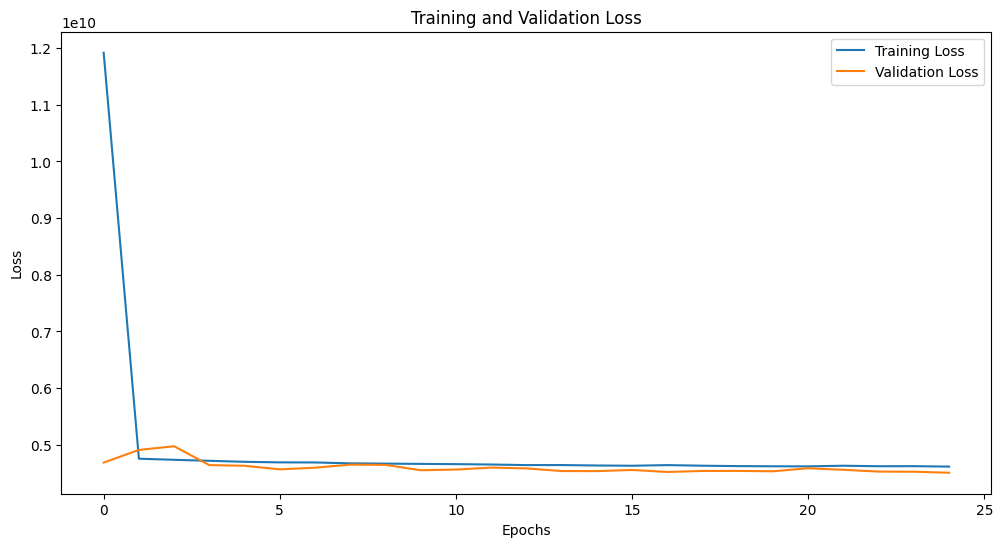

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [119]:
with open('../data/output/results.txt', 'a') as f:
    for result in results:
        # f.write(f"Model: {result['Model']}\n")
        f.write(f"Model: {result['Model']}_1\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n")
        f.write(f"Model Architecture: {result['Model Architecture']}\n")
        f.write(f"Optimizer: {result['Optimizer']}\n")
        f.write(f"Learning Rate: {result['Learning Rate']}\n")
        f.write(f"Batch Size: {result['Batch Size']}\n")
        f.write(f"Epochs: {result['Epochs']}\n")
        f.write("\n")

print("Results appended to results.txt")

Results appended to results.txt


In [121]:

# Save the model
model.save(r'../data/output/models/nn_model_SGD_1.h5')
print("Model saved as 'simple_nn_model.h5'")


Model saved as 'simple_nn_model.h5'


## Model Comparison

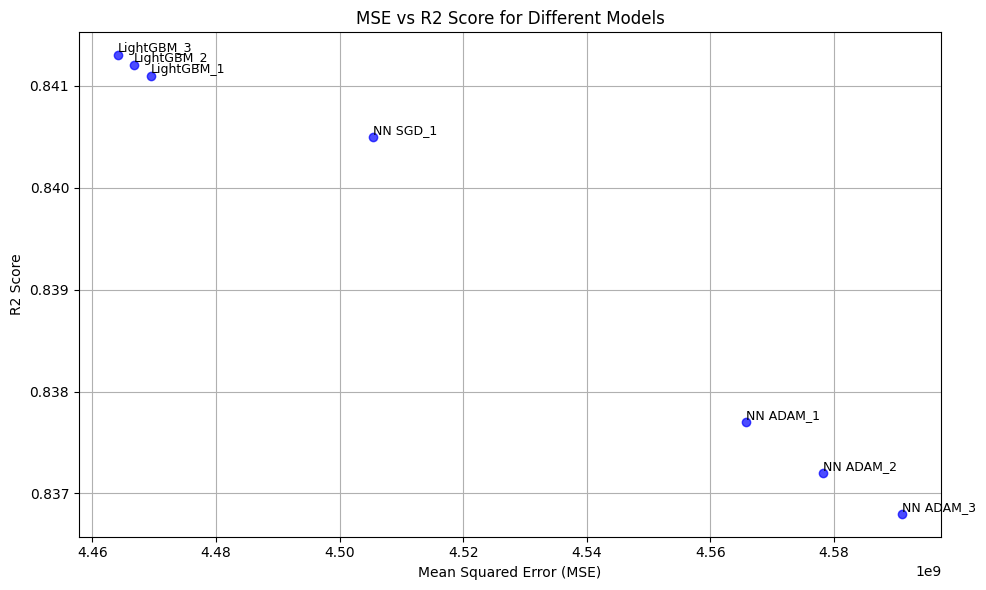

In [5]:
results_file = r'../data/output/results2.txt'

results = []

with open(results_file, 'r') as file:
    lines = file.readlines()

i = 0
while i < len(lines):
    if lines[i].strip() == '':
        i += 1
        continue
    
    model_name = None
    mse = None
    r2 = None
    
    while i < len(lines) and lines[i].strip() != '':
        line = lines[i].strip()
        
        if line.startswith('Model:'):
            model_name = line.split(': ')[1]
        elif line.startswith('Mean Squared Error:'):
            mse = float(line.split(': ')[1])
        elif line.startswith('R2 Score:'):
            r2 = float(line.split(': ')[1])
        
        i += 1
    
    if model_name and mse is not None and r2 is not None:
        results.append({
            'Model': model_name,
            'MSE': mse,
            'R2 Score': r2
        })

mse_scores = [result['MSE'] for result in results]
r2_scores = [result['R2 Score'] for result in results]
model_names = [result['Model'] for result in results]

plt.figure(figsize=(10, 6))
plt.scatter(mse_scores, r2_scores, color='b', alpha=0.7)
plt.title('MSE vs R2 Score for Different Models')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('R2 Score')

for i, model_name in enumerate(model_names):
    plt.text(mse_scores[i], r2_scores[i], model_name, fontsize=9, ha='left', va='bottom')

plt.savefig('../data/output/models_comparison.png')

plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression models perform consistently across different tests, indicating stability in predictions regardless of parameter adjustments. The best score and performance metrics remain identical. Therefore for simple linear regression day doesn't matter.

Random Forest Regression shows variability in performance with different day settings. The best performance is achieved when day was removed, indicating that day data gives harmful noise for training.

Neural network shows minor fluctuations in performance, with all tests yielding similar MSE and R2R2 scores. This indicates that while neural networks are slightly more sensitive to day adjustments, their performance remains fairly consistent.

LightGBM models perform consistently well across all tests, demonstrating strong predictive power and stability. LightGBM is sensitive for nonlinearity and didn't find any pattern in day data.

LightGBM consistently outperforms other models in terms of Mean Squared Error and R2R2 score, indicating it is the most effective model for this dataset. Random Forest Regressor shows potential to improve with proper tuning, while Linear Regression provide stable but less optimal performance. 

If we look closer to results (file results2.txt) we can see neural network with SGD optimizer is much closer to LightBGM models than with ADAM optimizers. I made one NN model with SGD- its more difficoult to set and optimize than ADAM, but learning speed and results are better. If we keep with NN opimalization we should get nearly the same results like LightGBM, maybe slightly better. However we need keep in mind that gradient boosting machines are highly performance for structured data (and much easier to train).